In [1]:
import pandas as pd
import numpy as np

from datetime import datetime




%matplotlib inline


import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

import plotly.graph_objects as go

In [2]:
mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)

sns.set(style="darkgrid")

![CRISP_DM](../reports/figures/CRISP_DM.png)

# Explorative Data Analysis

* focus is often a visual representation of the data 


In [7]:
df_plot=pd.read_csv('../data/processed/COVID_small_flat_table.csv',sep=';')

# df=pd.read_csv('../data/processed/COVID_final_set.csv',sep=';')

# grouped_df = df.groupby("country")

# df["sum_column"] = grouped_df[["confirmed"]].transform(sum)


# df = df.sort_values("sum_column", ascending=False)


# df = df.drop("sum_column", axis=1)


# grouped_df = df.groupby("country")

# final_sorted_values = grouped_df.get_group('India').sort_values("date", ascending=True)


In [8]:
# final_sorted_values.head()

# Matplotlib Example

/home/harsh/anaconda3/envs/ds/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<Figure size 1152x648 with 0 Axes>

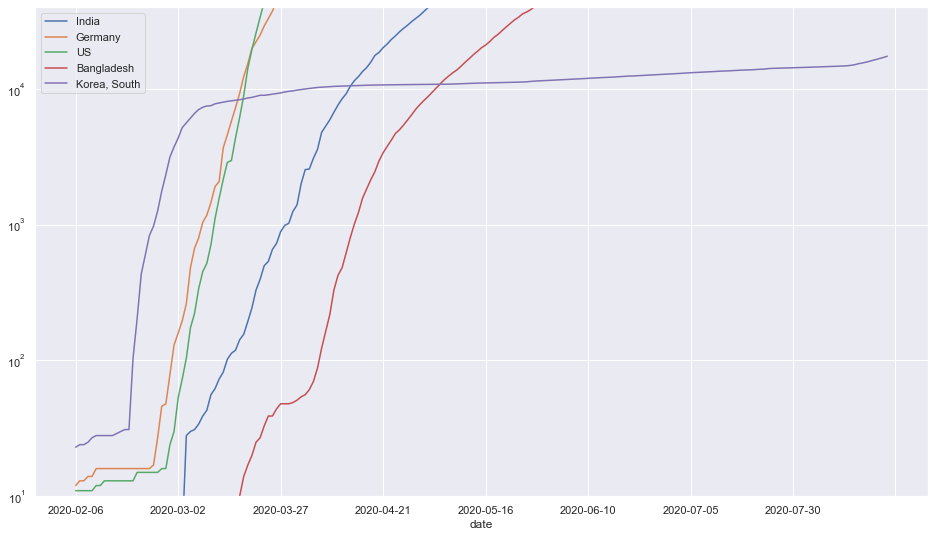

In [9]:
plt.figure();
ax=df_plot.iloc[15:,:].set_index('date').plot()
plt.ylim(10, 40000)
ax.set_yscale('log')

# Plot.ly

In [10]:
import plotly.graph_objects as go

In [11]:
import plotly
plotly.__version__

'4.9.0'

In [50]:
def getCountryValues(country):
    df=pd.read_csv('../data/processed/COVID_final_set.csv',sep=';')

    grouped_df = df.groupby("country")

    df["sum_column"] = grouped_df[["confirmed"]].transform(sum)


    df = df.sort_values("sum_column", ascending=False)


    country_list = df['country'].unique().tolist()

    df = df.drop("sum_column", axis=1)


    grouped_df = df.groupby("country")

    final_sorted_values = grouped_df.get_group(country).sort_values("date", ascending=True)
    
    return final_sorted_values, country_list


In [51]:
_,country_list = getCountryValues('India')

In [53]:
len(country_list[0:10])


10

In [46]:
# country_list=['India',
#               'US',
#               'Bangladesh',
#               'Germany',
#               'Korea, South',
#              ] 

In [22]:
df_plot.head()

,date,India,Germany,US,Bangladesh,"Korea, South"
0,2020-01-22,0,0,1,0,1
1,2020-01-23,0,0,1,0,1
2,2020-01-24,0,0,2,0,2
3,2020-01-25,0,0,2,0,2
4,2020-01-26,0,0,5,0,3


In [44]:
# df_plot.head()
# df_plot = df

# df=pd.read_csv('../data/processed/COVID_final_set.csv',sep=';')
print(df_plot.head())
print('\n\n')
print(df[df['country']=='Canada'].head())

         date  India  Germany  US  Bangladesh  Korea, South
0  2020-01-22      0        0   1           0             1
1  2020-01-23      0        0   1           0             1
2  2020-01-24      0        0   2           0             2
3  2020-01-25      0        0   2           0             2
4  2020-01-26      0        0   5           0             3



           date                      state country  confirmed  \
0    2020-01-22                    Alberta  Canada        0.0   
141  2020-01-22                   Manitoba  Canada        0.0   
145  2020-01-22              New Brunswick  Canada        0.0   
148  2020-01-22  Newfoundland and Labrador  Canada        0.0   
151  2020-01-22      Northwest Territories  Canada        0.0   

     confirmed_filtered  confirmed_DR  confirmed_filtered_DR  
0                   0.0           NaN                    NaN  
141                 0.0           NaN                    NaN  
145                 0.0           NaN                    

In [82]:
fig = go.Figure()
## defines how to plot the individual trace
for each in country_list[:5]:    
    fig.add_trace(go.Scatter(x=df[df['country']==each]['date'],
                                y=df[df['country']==each]['confirmed'],
                                mode='markers+lines',
                                opacity=0.9,
                                line_width=2,
                                marker_size=4, 
                                name=each
                                 )
                     )

## defines the overall layout properties
fig.update_layout(
    width=1024,
    height=900,
    xaxis_title="Time",
    yaxis_title="Confirmed infected people (source johns hopkins csse, log-scale)",
)
fig.update_yaxes(type="log",range=[1.1,5.5])


fig.update_layout(xaxis_rangeslider_visible=True)
#fig.show(renderer='chrome')
fig.show()

In [83]:
options = []
for each in country_list:
    d = {}
    d['label'] = each
    d['value'] = each
    options.append(d)
    

In [84]:
import dash
dash.__version__
import dash_core_components as dcc
import dash_html_components as html

app = dash.Dash()
app.layout = html.Div([
    
    html.Label('Multi-Select Country'),
    
    dcc.Dropdown(
        id='country_drop_down',        
        options=options,
        value=['US', 'Germany'], # which are pre-selected
        multi=True
    ),   
  
        
    dcc.Graph(figure=fig, id='main_window_slope')
])


In [85]:
from dash.dependencies import Input, Output

@app.callback(
    Output('main_window_slope', 'figure'),
    [Input('country_drop_down', 'value')])
def update_figure(country_list):
    
    traces = [] 
    for each in country_list:
        traces.append(dict(x=df[df['country']==each]['date'],
                                y=df[df['country']==each]['confirmed'],
                                mode='markers+lines',
                                opacity=0.9,
                                line_width=2,
                                marker_size=4, 
                                name=each
                        )
                )
        
    return {
            'data': traces,
            'layout': dict (
                width=1280,
                height=720,
                xaxis_title="Time",
                yaxis_title="Confirmed infected people (source johns hopkins csse, log-scale)",
                xaxis={'tickangle':-45,
                        'nticks':20,
                        'tickfont':dict(size=14,color="#7f7f7f"),
                        
                      },
                yaxis={'type':"log",
                       'range':'[1.1,5.5]'
                      }
        )
    }

In [86]:
# take care to press stop button befor calling once again, since address will be blocked (server up)
# if you have problems to find (kill) the process, use the following cmd commands (Linux)
# sudo lsof -n -i :8050 | grep LISTEN 
# kill -9 pid 

app.run_server(debug=True, use_reloader=False)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
